Extraigo los datos de los archivos de descarga:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extraer_marca(linea):
    ultimo_valor_str = linea.split("\t")[-1]
    ultimo_valor_str = ultimo_valor_str.replace(",", ".")
    ultimo_valor = float(ultimo_valor_str)
    return ultimo_valor


def extraer_periodo_frecuencia(linea):
    valores = linea.split("\t")
    periodo = valores[0]
    periodo = periodo.replace(",", ".")
    periodo = float(periodo)
    frecuencia = valores[1]
    frecuencia = frecuencia.replace(",", ".")
    frecuencia = float(frecuencia)
    return periodo, frecuencia


def convertir_descarga_dataframe(ruta_archivo):
    # Leer el archivo línea por línea
    with open(ruta_archivo, "r", encoding="latin-1") as f:
        lineas = f.readlines()

    marca_1 = extraer_marca(lineas[0])
    marca_2 = extraer_marca(lineas[2])

    periodo, frecuencia = [], []
    for i in range(5, len(lineas)):
        periodo_aux, frecuencia_aux = extraer_periodo_frecuencia(lineas[i])
        periodo.append(periodo_aux)
        frecuencia.append(frecuencia_aux)

    descarga = pd.DataFrame({"Periodo": periodo, "Frecuencia": frecuencia})

    # Encontrar las posiciones de las marcas
    pos_1 = descarga["Periodo"].ge(marca_1).idxmax()
    pos_2 = descarga["Periodo"].ge(marca_2).idxmax()

    # Recortar el DataFrame entre las marcas
    descarga = descarga.iloc[pos_1 : pos_2 + 1]

    return descarga

In [3]:
descarga_1 = convertir_descarga_dataframe("datos/descarga_1.txt")
descarga_2 = convertir_descarga_dataframe("datos/descarga_2.txt")
descarga_3 = convertir_descarga_dataframe("datos/descarga_3.txt")
descarga_4 = convertir_descarga_dataframe("datos/descarga_4.txt")
descarga_variable = convertir_descarga_dataframe("datos/descarga_variable.txt")

In [4]:
def calcular_promedio_frecuencia(descarga):
    promedio = descarga["Frecuencia"].mean()
    return promedio

promedio_1 = calcular_promedio_frecuencia(descarga_1)
promedio_2 = calcular_promedio_frecuencia(descarga_2)
promedio_3 = calcular_promedio_frecuencia(descarga_3)
promedio_4 = calcular_promedio_frecuencia(descarga_4)
promedio_variable = calcular_promedio_frecuencia(descarga_variable)


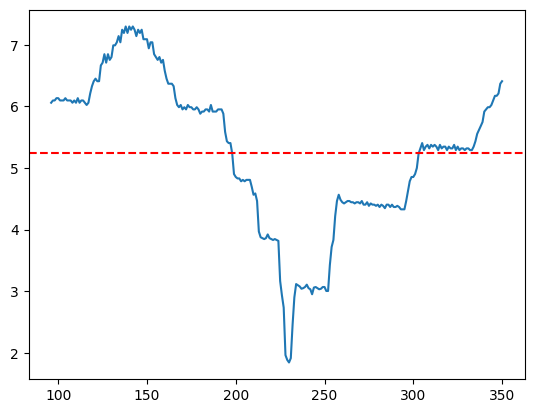

In [10]:
plt.figure()
plt.plot(descarga_variable["Frecuencia"])
plt.axhline(y=promedio_variable, color="r", linestyle="--")
plt.show()

Ahora analizo la parte del volumen de agua

In [5]:
volumen = 122.0867 # kg

tiempo_1 = 49.27 # s
tiempo_2 = 37.86 # s  
tiempo_3 = 33.26 # s
tiempo_4 = 41.96 # s
tiempo_variable = 52.41 # s

caudal_1 = volumen / tiempo_1
caudal_2 = volumen / tiempo_2
caudal_3 = volumen / tiempo_3
caudal_4 = volumen / tiempo_4
caudal_variable = volumen / tiempo_variable

Ahora ploteo tipo scatter frecuencia_mean vs caudal

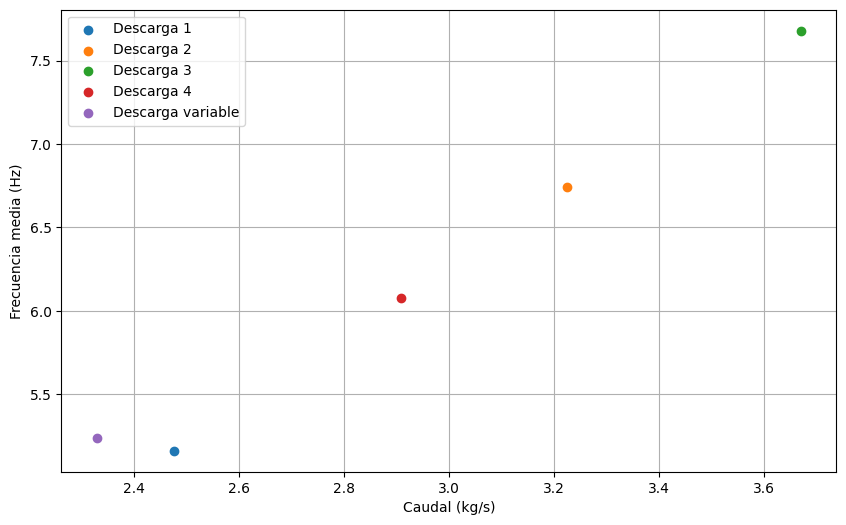

In [7]:
# Ahora ploteo tipo scatter frecuencia_mean vs caudal
plt.figure(figsize=(10, 6))
plt.scatter(caudal_1, promedio_1, label="Descarga 1")
plt.scatter(caudal_2, promedio_2, label="Descarga 2")
plt.scatter(caudal_3, promedio_3, label="Descarga 3")
plt.scatter(caudal_4, promedio_4, label="Descarga 4")
plt.scatter(caudal_variable, promedio_variable, label="Descarga variable")
plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.grid()
plt.show()

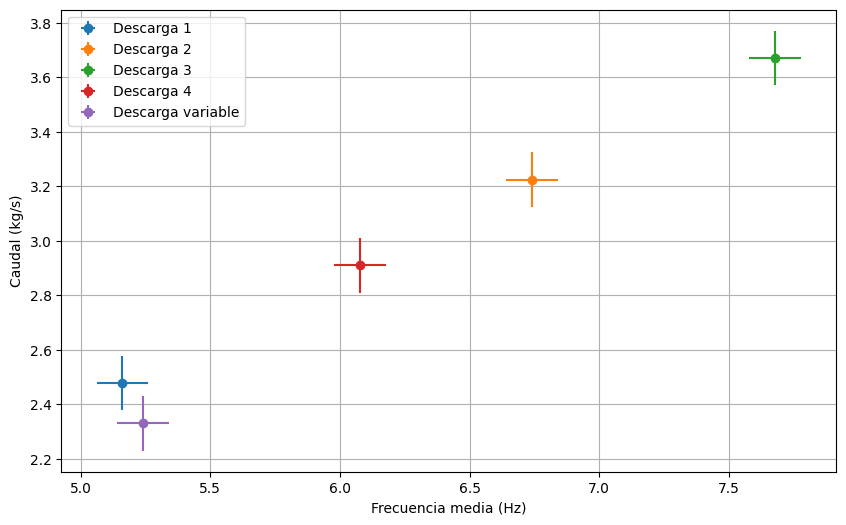

In [30]:
# Invento incertezas en los datos de forma provisoria
error_caudal = 0.1
error_frecuencia = 0.1

# Ploteo con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(
    promedio_1,
    caudal_1,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 1",
)
plt.errorbar(
    promedio_2,
    caudal_2,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 2",
)
plt.errorbar(
    promedio_3,
    caudal_3,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 3",
)
plt.errorbar(
    promedio_4,
    caudal_4,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 4",
)
plt.errorbar(
    promedio_variable,
    caudal_variable,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga variable",
)
plt.xlabel("Frecuencia media (Hz)")
plt.ylabel("Caudal (kg/s)")
plt.legend()
plt.grid()
plt.show()

Ajuste: y = 2.132x + -0.193


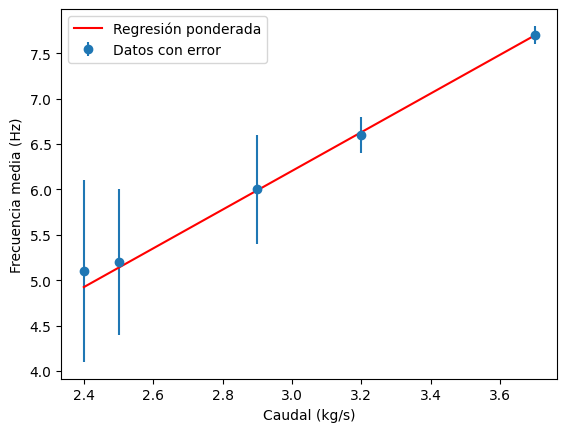

Ajuste: y = 2.019x + 0.183


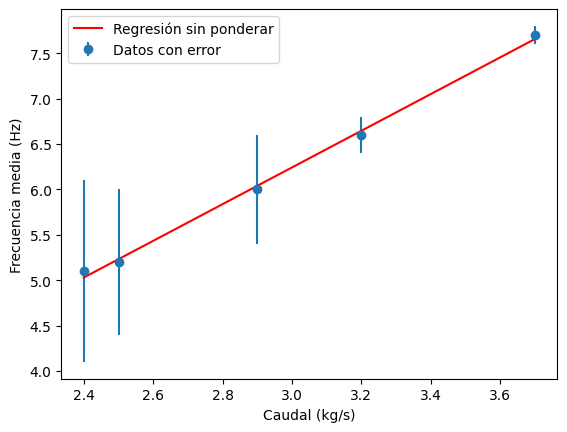

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           2.26e-05
Time:                        10:37:30   Log-Likelihood:                 8.5566
No. Observations:                   5   AIC:                            -13.11
Df Residuals:                       3   BIC:                            -13.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1933      0.166     -1.168      0.3

/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


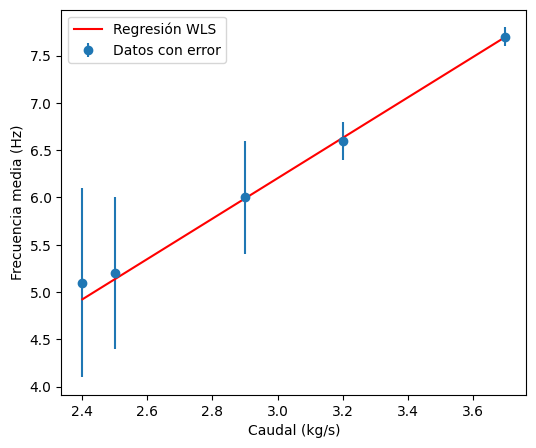

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos (ejemplo)
x = np.array([2.4, 2.5, 2.9, 3.2, 3.7])  # Caudal
y = np.array([5.1, 5.2, 6.0, 6.6, 7.7])  # Frecuencia media
sigma_y = np.array([1, 0.8, 0.6, 0.2, 0.1])  # Incertidumbre en y

# Definir función lineal
def f(x, a, b):
    return a * x + b

# Ajuste con pesos (1/sigma_y**2)
popt, pcov = curve_fit(f, x, y, sigma=sigma_y, absolute_sigma=True)

# Parámetros ajustados
a_fit, b_fit = popt
print(f"Ajuste: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, f(x_fit, *popt), label="Regresión ponderada", color="red")
plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

# Regresion sin ponderar

# Ajuste sin pesos
popt, pcov = curve_fit(f, x, y)

# Parámetros ajustados
a_fit, b_fit = popt
print(f"Ajuste: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, f(x_fit, *popt), label="Regresión sin ponderar", color="red")
plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

# Modelo WLS
X = sm.add_constant(x)  # Agregar término independiente
model = sm.WLS(y, X, weights=1/sigma_y**2)  # Pesos = 1/varianza
results = model.fit()
print(results.summary())

# Coeficientes corregidos
b_fit, a_fit = results.params  # results.params[0] = intercepto, results.params[1] = pendiente
print(f"Ajuste WLS: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.figure(figsize=(6, 5))
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")

# Línea de regresión corregida
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, a_fit*x_fit + b_fit, label="Regresión WLS", color="red")

plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

